In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 33.8 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('/Users/vaishnavimocherla/Desktop/Rh/Adidas.xlsx')

In [5]:
df.head()

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet
1,Foot Locker,1185732,2020-02-04,Northeast,New York,New York,Men's Apparel,60.0,825,495000.0,148500.0,0.30,Outlet
2,Foot Locker,1185732,2020-02-05,Northeast,New York,New York,Women's Apparel,50.0,950,475000.0,118750.0,0.25,Outlet
3,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.0,0.50,Outlet
4,Foot Locker,1185732,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55.0,925,508750.0,152625.0,0.30,Outlet


In [18]:
df['Retailer'].unique()
df['Retailer'].value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [21]:
df['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [15]:
df['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [16]:
df['Product'].unique()


array(["Women's Athletic Footwear", "Men's Apparel", "Women's Apparel",
       "Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear"], dtype=object)

In [17]:
df['SalesMethod'].unique()

array(['Outlet', 'In-store', 'Online'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Retailer         9648 non-null   object        
 1   RetailerID       9648 non-null   int64         
 2   InvoiceDate      9648 non-null   datetime64[ns]
 3   Region           9648 non-null   object        
 4   State            9648 non-null   object        
 5   City             9648 non-null   object        
 6   Product          9648 non-null   object        
 7   PriceperUnit     9648 non-null   float64       
 8   UnitsSold        9648 non-null   int64         
 9   TotalSales       9648 non-null   float64       
 10  OperatingProfit  9648 non-null   float64       
 11  OperatingMargin  9648 non-null   float64       
 12  SalesMethod      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Transformation

In [25]:
for col in ['State', 'City', 'Product']:
    print(f"{col}: {df[col].nunique()} unique → {df[col].unique()[:5]}")


State: 50 unique → ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania']
City: 52 unique → ['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago']
Product: 6 unique → ["Women's Athletic Footwear" "Men's Apparel" "Women's Apparel"
 "Men's Street Footwear" "Men's Athletic Footwear"]


In [26]:
df['State'].str.lower().str.strip().value_counts()


State
california        432
texas             432
new york          360
florida           360
mississippi       216
oregon            216
louisiana         216
idaho             216
new mexico        216
georgia           216
arkansas          216
virginia          216
oklahoma          216
connecticut       216
rhode island      216
massachusetts     216
vermont           216
utah              216
arizona           216
new hampshire     216
pennsylvania      216
nevada            216
alabama           216
tennessee         216
south dakota      144
illinois          144
colorado          144
new jersey        144
delaware          144
maryland          144
west virginia     144
indiana           144
wisconsin         144
iowa              144
north dakota      144
michigan          144
kansas            144
missouri          144
minnesota         144
montana           144
kentucky          144
ohio              144
north carolina    144
south carolina    144
nebraska          144
main

In [27]:
df['InvoiceDate'].head()

0   2020-02-03
1   2020-02-04
2   2020-02-05
3   2020-02-06
4   2020-02-07
Name: InvoiceDate, dtype: datetime64[ns]

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day

In [31]:
df.head()

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod,year,month,day
0,Foot Locker,1185732,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet,2020,2,3
1,Foot Locker,1185732,2020-02-04,Northeast,New York,New York,Men's Apparel,60.0,825,495000.0,148500.0,0.30,Outlet,2020,2,4
2,Foot Locker,1185732,2020-02-05,Northeast,New York,New York,Women's Apparel,50.0,950,475000.0,118750.0,0.25,Outlet,2020,2,5
3,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.0,0.50,Outlet,2020,2,6
4,Foot Locker,1185732,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55.0,925,508750.0,152625.0,0.30,Outlet,2020,2,7


In [32]:
df['Product'] = df['Product'].str.strip().str.title()
df['SalesMethod'] = df['SalesMethod'].str.strip().str.title()   
df['Retailer'] = df['Retailer'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()
df['City'] = df['City'].str.strip().str.title() 

In [34]:
# Create a new column for Revenue per Unit = TotalSales / UnitsSold
df['RevenuePerUnit'] = df['TotalSales'] / df['UnitsSold']

In [53]:
df.head()

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,...,SalesMethod,year,month,day,RevenuePerUnit,ProfitMargin,SalesCategory,CumulativeSales_Region,MonthlyAvgSales,percent_contribution
792,Foot Locker,1185732,2020-10-21,Midwest,Minnesota,Minneapolis,Men'S Apparel,45.0,150,67500.0,...,In-Store,2020,10,21,450.0,30.0,Medium,67500.0,126003.127907,0.030699
4680,Foot Locker,1185732,2020-10-21,Midwest,Minnesota,Minneapolis,Men'S Apparel,43.0,39,1677.0,...,Online,2020,10,21,43.0,45.0,Low,69177.0,126003.127907,0.000763
793,Foot Locker,1185732,2020-10-22,Midwest,Minnesota,Minneapolis,Women'S Apparel,35.0,250,87500.0,...,In-Store,2020,10,22,350.0,45.0,High,156677.0,126003.127907,0.039795
4681,Foot Locker,1185732,2020-10-22,Midwest,Minnesota,Minneapolis,Women'S Apparel,32.0,65,2080.0,...,Online,2020,10,22,32.0,56.0,Low,158757.0,126003.127907,0.000946
794,Foot Locker,1185732,2020-10-23,Midwest,Minnesota,Minneapolis,Men'S Street Footwear,35.0,500,175000.0,...,In-Store,2020,10,23,350.0,35.0,High,333757.0,126003.127907,0.079590


In [ ]:
#Profit Margin 
df['ProfitMargin'] = (df['OperatingProfit'] / df['TotalSales']) * 100

In [44]:
# Sales Category (e.g., flag high vs low sales days using quantiles).

# Suppose df["TotalSales"] is your numeric column
df["SalesCategory"] = pd.qcut(
    df["TotalSales"], 
    q=3,   # split into 3 categories (low, medium, high)
    labels=["Low", "Medium", "High"]
)


In [48]:
df = df.sort_values(["Region", "InvoiceDate"])

df["CumulativeSales_Region"] = (
    df.groupby("Region")["TotalSales"].cumsum()
)


In [50]:
# Montly avg sales 
df['MonthlyAvgSales'] = df.groupby(['year', 'month'])['TotalSales'].transform('mean')

In [52]:
# 
df['percent_contribution'] = df.groupby(['Retailer'])['TotalSales'].transform(lambda x: x / x.sum() * 100)

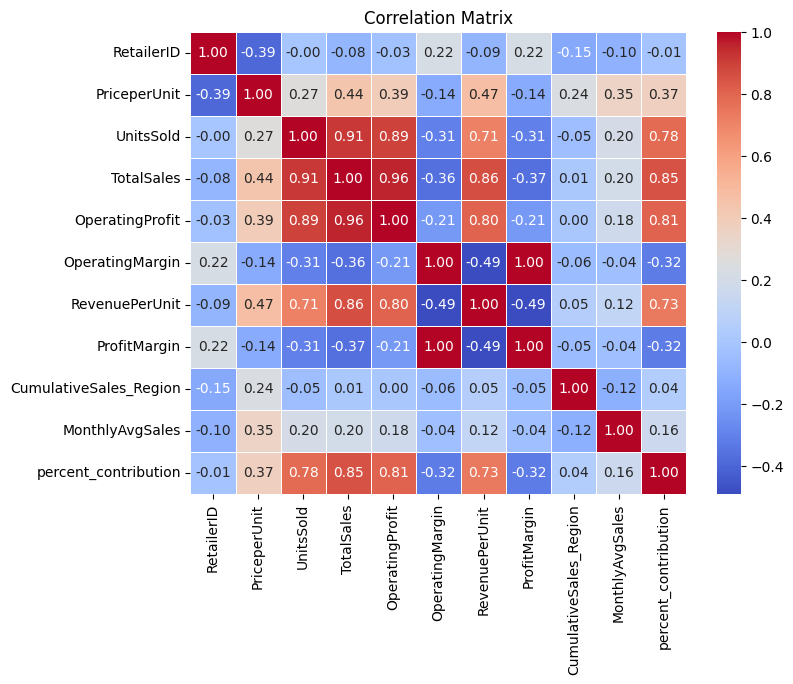

In [86]:
#correlation matrix between numerical columns only 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

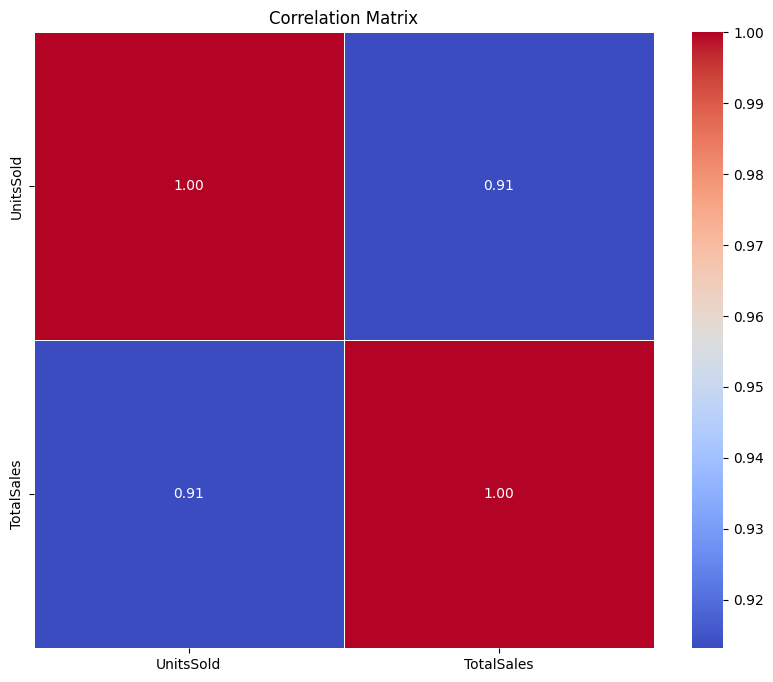

In [88]:
sales_corr=df[["UnitsSold", "TotalSales"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(sales_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Aggregate 

In [95]:
df.groupby('Region').agg(City_count=('City', 'nunique'))

,City_count
Region,
Midwest,13
Northeast,13
South,8
Southeast,7
West,13


In [ ]:
df.groupby(['Region'])